# Computational analysis of stability at $l^2/W^2 = 0.01$ and $k\in [0,20]$ 
It is expected that more points will be unstable because it was observed that increasing $k$ serves to de-stabilize the system.

In [1]:
from os import listdir 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
root_dir = "data/k-scan/"
k_scan_data = [name for name in listdir(root_dir) if not name=="README.txt"]
sample_data = np.loadtxt(root_dir+k_scan_data[0],delimiter=',',dtype=np.complex128)
ng, nk = sample_data.shape
na = len(k_scan_data)
data = np.zeros((na, ng, nk), dtype=np.complex128)

In [3]:
print(_gds)

NameError: name '_gds' is not defined

In [3]:
for i in range(len(k_scan_data)):
    filename = k_scan_data[i]
    a_ind = int(filename.split("_")[1])
    data[a_ind] = np.loadtxt(root_dir + filename, delimiter=',', dtype=np.complex_)

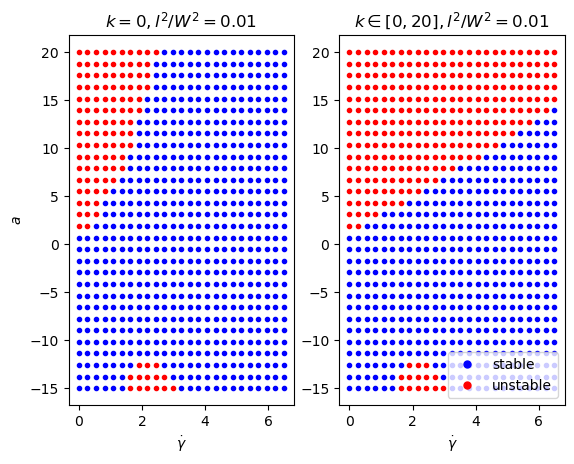

In [4]:
"""
==== THESE WERE THE NUMBERS USED TO GENERATE THIS DATA ====
gdl, gdr, gdn = 0,6.5,25
al, ar, an = -15,20,30
_gds = np.linspace(gdl,gdr,gdn)
_as = np.linspace(al,ar,an)
"""
def max_re(zs):
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.real > acc.real:
            acc = z
            index = i
    return acc,index

gdl, gdr, gdn = 0,6.5,25
al, ar, an = -15,20,30
_gds = np.linspace(gdl,gdr,gdn)
_as = np.linspace(al,ar,an)

# plot the computational results for k =0
fig, axs = plt.subplots(1, 2)
for i in range(na):
    for j in range(ng):
        c = "red" if data[i][j][0].real > 0 else "blue"
        axs[0].plot(_gds[j],_as[i],".",color=c, picker=True, alpha=1)
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable')
axs[0].set_title("$k=0, l^2/W^2 = 0.01$")
# plt.legend(handles=[blue_dot, red_dot], loc='upper right')

# plot the computational results for k in [0,20]
for i in range(na):
    for j in range(ng):
        c = "red" if max_re(data[i][j])[0].real > 0 else "blue"
        axs[1].plot(_gds[j],_as[i],".",color=c, picker=True, alpha=1)
axs[0].set_xlabel("$\dot\gamma$")
axs[1].set_xlabel("$\dot\gamma$")
axs[0].set_ylabel("$a$")
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable')
axs[1].set_title("$k\in [0,20], l^2/W^2 = 0.01$")
leg = plt.legend(handles=[blue_dot, red_dot], loc='lower right')

Text(0.5, 1.0, 'Destablizing Effect of $k$')

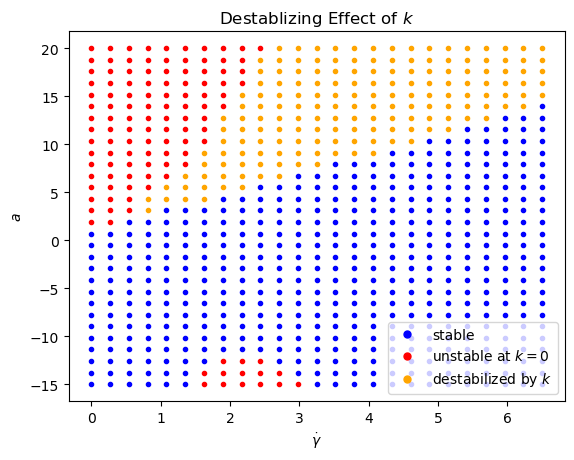

In [5]:
def max_re_mod(zs):
    if zs[0].real > 0:
        return zs[0], 0
    
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.real > acc.real:
            acc = z
            index = i
    return acc,index

for i in range(na):
    for j in range(ng):
        max_real_z, ind = max_re_mod(data[i][j])
        c = ("red" if ind==0 else "orange") if max_real_z.real > 0 else "blue"
        plt.plot(_gds[j],_as[i],".",color=c, picker=True, alpha=1)
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable at $k=0$')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                      markersize=10, label='destabilized by $k$')
plt.legend(handles=[blue_dot, red_dot, orange_dot], loc="lower right")
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
plt.title("Destablizing Effect of $k$")

Text(0.5, 1.0, 'Destablizing Effect of $k$')

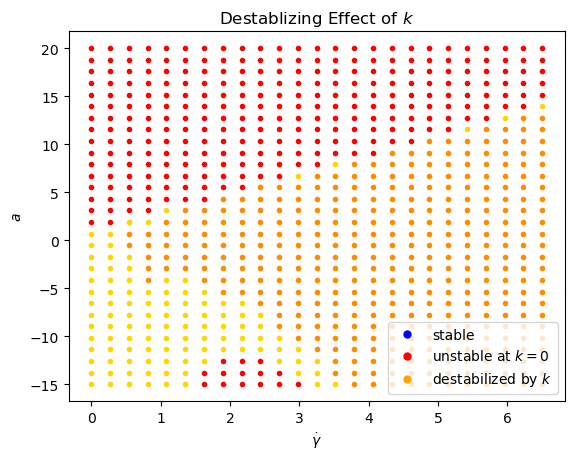

In [23]:
def max_re_mod(zs):
    if zs[0].real > 0:
        return zs[0], 0
    
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.real > acc.real:
            acc = z
            index = i
    return acc,index

def has_oscillation(sigs):
    all_zero_imag = np.all(np.abs(sigs.imag) > 1e-3)
    return not all_zero_imag

for i in range(na):
    for j in range(ng):
        max_real_z, ind = max_re_mod(data[i][j])
        c = ("red" if has_oscillation(data[i][j]) else "pink") if max_real_z.real > 0 else ("gold" if has_oscillation(data[i][j]) else "darkorange")
        plt.plot(_gds[j],_as[i],".",color=c, picker=True, alpha=1)
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable at $k=0$')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                      markersize=10, label='destabilized by $k$')
plt.legend(handles=[blue_dot, red_dot, orange_dot], loc="lower right")
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
plt.title("Destablizing Effect of $k$")

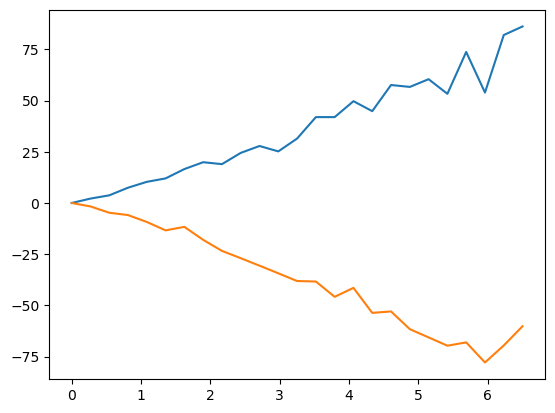

In [24]:
def max_im_mod(zs):
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.imag > acc.imag:
            acc = z
            index = i
    return acc,index

def min_im_mod(zs):
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.imag < acc.imag:
            acc = z
            index = i
    return acc,index

max_im_parts = np.zeros(ng)
min_im_parts = np.zeros(ng)
for i in range(ng):
    for j in range(na):
        max_im_z, ind = max_im_mod(data[j][i])
        min_im_z, ind = min_im_mod(data[j][i])
        max_im_parts[i] = max_im_z.imag
        min_im_parts[i] = min_im_z.imag
plt.plot(_gds, max_im_parts)
plt.plot(_gds, min_im_parts)
plt.title("")

# Analysis using the interval $[-1, 1]$ instead of $[-1/2, 1/2]$ as in the previous analyses

Text(0.5, 1.0, 'Destablizing Effect of $k$')

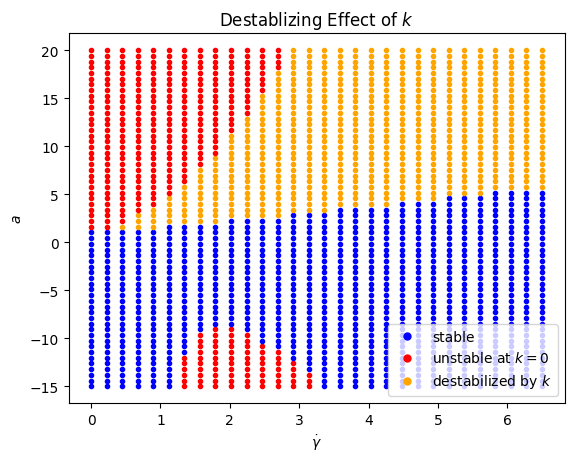

In [4]:
root_dir = "data/k-scan-new/"
k_scan_data = [name for name in listdir(root_dir) if not name=="README.txt"]
sample_data = np.loadtxt(root_dir+k_scan_data[0],delimiter=',',dtype=np.complex128)
ng, nk = sample_data.shape
na = len(k_scan_data)
data = np.zeros((na, ng, nk), dtype=np.complex128)
for i in range(len(k_scan_data)):
    filename = k_scan_data[i]
    a_ind = int(filename.split("_")[1])
    data[a_ind] = np.loadtxt(root_dir + filename, delimiter=',', dtype=np.complex_)
def max_re_mod(zs):
    if zs[0].real > 0:
        return zs[0], 0
    
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.real > acc.real:
            acc = z
            index = i
    return acc,index
# ============= DATA RANGES =================
gdl, gdr, gdn = 0,6.5,30
al, ar, an = -15,20,60
_gds = np.linspace(gdl,gdr,gdn)
_as = np.linspace(al,ar,an)
# ===========================================
for i in range(na):
    for j in range(ng):
        max_real_z, ind = max_re_mod(data[i][j])
        c = ("red" if ind==0 else "orange") if max_real_z.real > 0 else "blue"
        plt.plot(_gds[j],_as[i],".",color=c, picker=True, alpha=1)
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable at $k=0$')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                      markersize=10, label='destabilized by $k$')
plt.legend(handles=[blue_dot, red_dot, orange_dot], loc="lower right")
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
plt.title("Destablizing Effect of $k$")

Text(0.5, 0, '$k$')

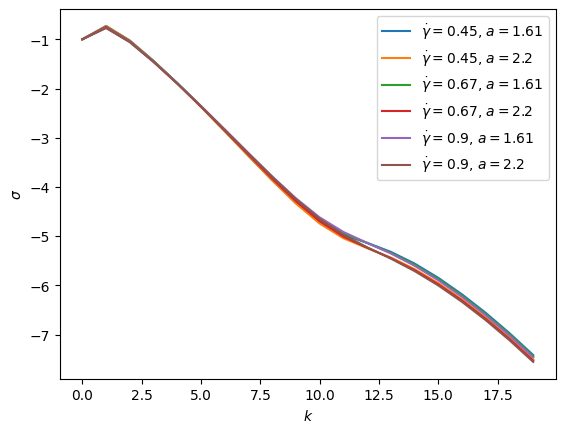

In [23]:
for i in range(2,5):
    for j in range(28, 30):
        plt.plot(np.arange(20), data[i,j,:].real, label=f"$\dot\gamma={np.round(_gds[i],2)}$, $a={np.round(_as[j],2)}$")

plt.legend()
plt.ylabel("$\sigma$")
plt.xlabel("$k$")